In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv("adult.csv")
initial_no_rows = dataset.shape[0]
dataset = dataset.replace({'?':np.nan}).dropna()
clean_no_rows = dataset.shape[0]
print("Number of rows in the original dataset: {}".format(initial_no_rows))
print("Number of rows deleted: {}".format(initial_no_rows - clean_no_rows))
print("Number of rows in the clean dataset: {}".format(clean_no_rows))

Number of rows in the original dataset: 48842
Number of rows deleted: 3620
Number of rows in the clean dataset: 45222


In [44]:
dataset = dataset[dataset['income'].str.contains(">50K")]
dataset['education'].value_counts()

Bachelors       3178
HS-grad         2416
Some-college    1990
Masters         1393
Prof-school      592
Assoc-voc        504
Doctorate        399
Assoc-acdm       398
11th              89
10th              82
7th-8th           55
12th              43
9th               38
5th-6th           22
1st-4th            8
Preschool          1
Name: education, dtype: int64

In [90]:
class LaplaceMechanism:
    def __init__(self, dataset, mu=0.0, epsilon=1):
        self.dataset = dataset
        self.sensitivity = 1 # step 2
        self.mu = mu
        self.scale = self.sensitivity / epsilon
        self.distribution = dict(zip(dataset['education'].value_counts().index.tolist(),list(dataset['education'].value_counts())))
        
    # Step 1: Compute the query
    def query_all(self):
        return list(self.distribution.values())
    
    # Step 3: Draw random samples from laplace distribution
    def draw_samples(self):
        return np.random.laplace(self.mu, self.scale, len(self.distribution.values()))
    
    # Step 4 and 5: Add random noise to the real answer and return
    def get_noisy_data(self):
        return self.query_all() + self.draw_samples()

In [96]:
laplace_mechanism = LaplaceMechanism(dataset, epsilon=0.01)
education_levels = laplace_mechanism.distribution.keys()
real_data = list(laplace_mechanism.distribution.values())
noisy_data = laplace_mechanism.get_noisy_data()

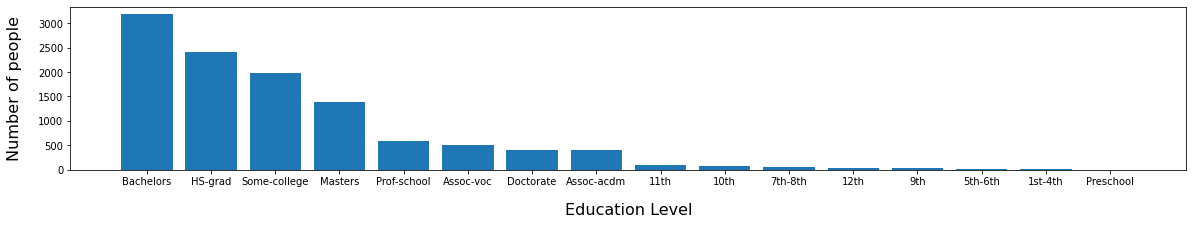

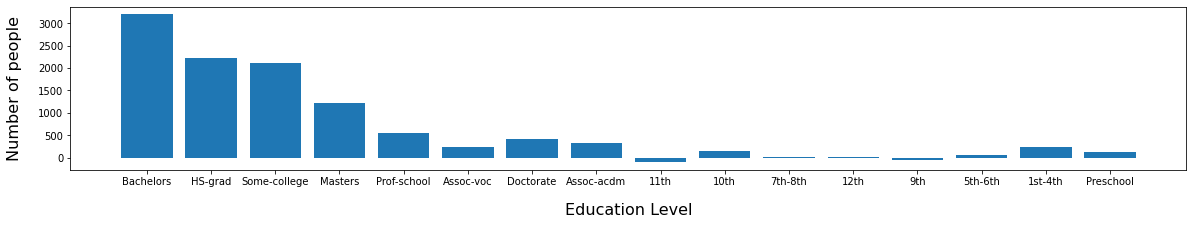

In [97]:
# Real histogram
plt.figure(figsize=(20, 3))
plt.xlabel("Education Level", labelpad=16, fontsize=16)
plt.ylabel("Number of people", labelpad=16, fontsize=16)
plt.bar(education_levels, real_data)
plt.show()

# Noisy histogram
plt.figure(figsize=(20, 3))
plt.xlabel("Education Level", labelpad=16, fontsize=16)
plt.ylabel("Number of people", labelpad=16, fontsize=16)
plt.bar(education_levels, noisy_data)
plt.show()

In [98]:
epsilon_values = [0.01, 0.05, 0.1, 0.5, 1.0]
for epsilon in epsilon_values:
    laplace_mechanism = LaplaceMechanism(dataset, epsilon=epsilon)
    education_levels = laplace_mechanism.distribution.keys()
    real_data = list(laplace_mechanism.distribution.values())
    noisy_data = laplace_mechanism.get_noisy_data()

    average_error = sum(abs(real_data - noisy_data)) / len(real_data)
    print(f'Average error is {average_error}')

Average error is 110.17459222156177
Average error is 26.073364953941386
Average error is 8.95866997573023
Average error is 1.80413673872519
Average error is 1.275869541928947
